In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
import pyloras
from xgboost import XGBClassifier

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\kagan\Desktop\Makine_öğrenmesi_Projesi\data set.csv\data set.csv")

In [3]:
# Drop the "Consumer ID" column
data = data.iloc[:, 1:]

In [4]:
#I will drop the CONS_NO column since it seems to provide no information as well as being of string type
data = data.drop("CONS_NO", axis=1)

In [5]:
# Check summary statistics
summary_stats = data.describe()

In [6]:
# Check the number of instances of each class
class_counts = data['FLAG'].value_counts()

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (X) ve hedef değişken (y)
X = data.iloc[:, :-1]
y = data['FLAG']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost modelini tanımla
model = xgb.XGBClassifier()

# Modeli eğit
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Performans metriklerini yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9255457227138643

Confusion Matrix:
[[7668   57]
 [ 574  176]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7725
           1       0.76      0.23      0.36       750

    accuracy                           0.93      8475
   macro avg       0.84      0.61      0.66      8475
weighted avg       0.91      0.93      0.91      8475



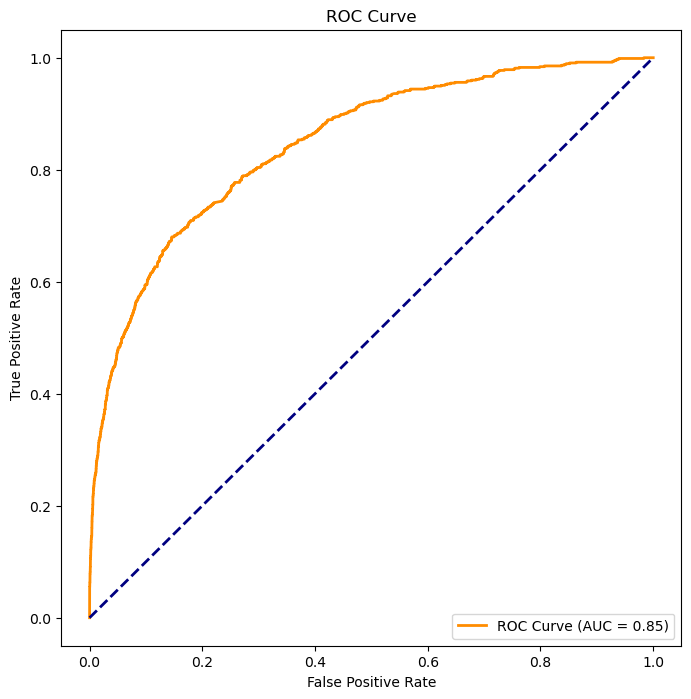

In [9]:
# Test seti üzerinde tahmin olasılıklarını al
from sklearn.metrics import roc_curve, auc
y_probs = model.predict_proba(X_test)[:, 1]

# ROC Curve hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# ROC Curve çizdir
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()